In [16]:
from clarin_datasets.cst_wikinews_dataset import CSTWikinewsDataset
from clarin_datasets.utils import embed_sentence, PLOT_COLOR_PALETTE

In [2]:
dataset = CSTWikinewsDataset()
dataset.load_data()

2022-09-23 15:30:49.670 WARNING datasets.builder: Using custom data configuration default
2022-09-23 15:30:49.815 WARNING datasets.builder: Reusing dataset cst-wikinews (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___cst-wikinews/default/0.0.0/28ea3759f55d5608d5b98f7f694d75a4276a32139203405e3da80ad034a78566)


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
subset_to_project = "train"

In [17]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [12]:
first_sentences = dataset.data_dict[subset_to_project]["sentence_1"].values
second_sentences = dataset.data_dict[subset_to_project]["sentence_2"].values
labels = dataset.data_dict[subset_to_project]["label"].values
first_sentences_embedded = np.array([embed_sentence(x) for x in first_sentences])
second_sentences_embedded = np.array([embed_sentence(x) for x in second_sentences])
mean_embeddings = (first_sentences_embedded + second_sentences_embedded) / 2

In [14]:
reducer = TSNE(
    n_components=2
)

/Users/mariuszkossakowski/opt/anaconda3/envs/datasets-explorer/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mariuszkossakowski/opt/anaconda3/envs/datasets-explorer/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


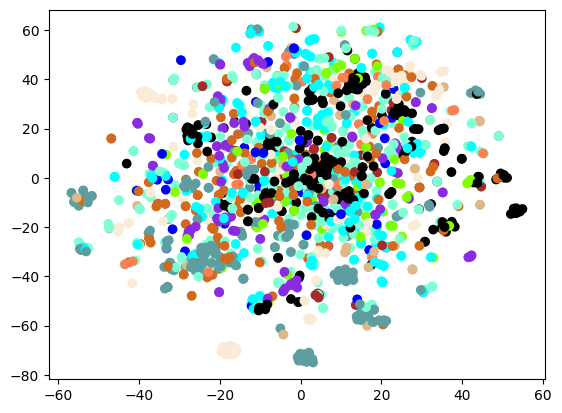

In [20]:
plt.scatter(
    x=transformed_embeddings[:, 0],
    y=transformed_embeddings[:, 1],
    c=[
        PLOT_COLOR_PALETTE[i] for i in labels
    ]
)
plt.show()